In [391]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from statsmodels.api import OLS
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [392]:
training_data = pd.read_csv("house-prices-advanced-regression-techniques/train.csv", index_col="Id")
testing_data = pd.read_csv("house-prices-advanced-regression-techniques/test.csv", index_col="Id")

In [399]:
training_data.shape

(1460, 80)

In [400]:
testing_data.shape

(1459, 79)

In [401]:
all_data = pd.concat((training_data, testing_data)).reset_index(drop=True)
all_data.shape

(2919, 80)

In [402]:
all_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2917,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


In [403]:
def ConvertStringToInt(df):
  columns_to_encode = list(df.select_dtypes(include=['category','object'])) #gets all columns with non-numeric values
  le = LabelEncoder()
  for feature in columns_to_encode:
      try:
          df[feature] = le.fit_transform(df[feature])
      except:
          print('Error encoding '+feature)
  return df

In [404]:
all_data.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis=1, inplace=True)
columns_has_null = all_data.isna().sum().sort_values(ascending=False)
columns_has_null[columns_has_null > 0]

In [406]:
all_data = ConvertStringToInt(all_data)
all_data = all_data.replace({np.NaN:0})

# Forest regression starts here

In [407]:
training_data = all_data.iloc[:1460, :]
testing_data = all_data.iloc[-1459:, :]
training_data.shape, testing_data.shape

((1460, 75), (1459, 75))

In [408]:
X = all_data.iloc[:, :-1]
y = all_data.iloc[:, -1:]
X_train, X_test = training_data.iloc[:,:-1], testing_data.iloc[:,:-1]
#X_test
y_train, y_test = training_data.iloc[:,-1:], testing_data.iloc[:,-1:]
#y_test.drop(['SalePrice'], axis=1, inplace=True)
X_test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1460,20,2,80.0,11622,1,3,3,0,4,0,...,0,0,0,120,0,0,6,2010,8,4
1461,20,3,81.0,14267,1,0,3,0,0,0,...,36,0,0,0,0,12500,6,2010,8,4
1462,60,3,74.0,13830,1,0,3,0,4,0,...,34,0,0,0,0,0,3,2010,8,4
1463,60,3,78.0,9978,1,0,3,0,4,0,...,36,0,0,0,0,0,6,2010,8,4
1464,120,3,43.0,5005,1,0,1,0,4,0,...,82,0,0,144,0,0,1,2010,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,4,21.0,1936,1,3,3,0,4,0,...,0,0,0,0,0,0,6,2006,8,4
2915,160,4,21.0,1894,1,3,3,0,4,0,...,24,0,0,0,0,0,4,2006,8,0
2916,20,3,160.0,20000,1,3,3,0,4,0,...,0,0,0,0,0,0,9,2006,8,0
2917,85,3,62.0,10441,1,3,3,0,4,0,...,32,0,0,0,0,700,7,2006,8,4


In [409]:
forest = RandomForestRegressor()
forest.fit(X_train, y_train)

<ipython-input-409-51c3477f772d>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)


RandomForestRegressor()

In [410]:
X_train.shape

(1460, 74)

In [411]:
X_test.shape

(1459, 74)

# Feature selection

In [412]:
sns.set_context("paper")
sns.set_style("ticks")

In [413]:
feature_names = [x for x in X.columns]
importances = forest.feature_importances_
sorted_lists = sorted(zip(importances, feature_names), reverse=True)
importances, feature_names = [[x[0] for x in sorted_lists], [x[1] for x in sorted_lists]]

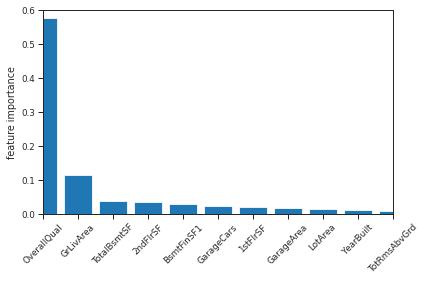

In [414]:
plt.figure()
plt.bar(feature_names, importances)
plt.xticks(rotation=45)
plt.ylabel(r"feature importance")
plt.ylim(0, 0.6)
plt.xlim(0, 10)
plt.tight_layout()
plt.show()

# Random Forest Model Prediction for 50% of missing housing data

In [415]:
#ml_model = LogisticRegression(penalty)
#ml_model.fit(X_train, y_train)

In [416]:
print("model score on training data:", forest.score(X_train, y_train))
#print("model score on test data:", forest.score(X_test, y_test)) # we do not need this as we do not yet have any prices to compare the random forest model for the missing data
y_predicted = forest.predict(X_test) # This becomes our predicted prices for the missing dataset using forest prediction

model score on training data: 0.9826419306748017


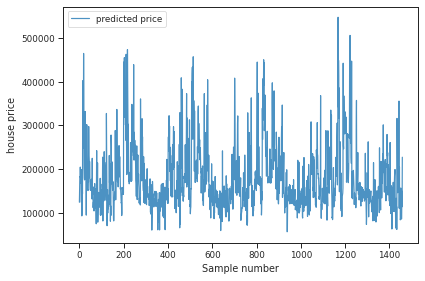

In [417]:
fig,ax = plt.subplots()
#plt.plot(y_test.to_numpy(), alpha = 0.8,label=r"observed price")
plt.plot(forest.predict(X_test), alpha=0.8, label=r"predicted price")

#always label your axes
plt.xlabel(r"Sample number")
plt.ylabel(r"house price")

# create a legend
plt.legend(loc="upper left")
#ax.xaxis.set_minor_locator(MultipleLocator(2))
#ax.yaxis.set_minor_locator(MultipleLocator(0.2))
#plt.xlim(0,100)
#plt.ylim(0.5,6)

plt.tight_layout()
plt.savefig("House_price_regression.png", dpi=600)
#sns.despine()
plt.show()

# Reverse Forest 50:50 split to verify that the prediction is correct

In [418]:
forest = RandomForestRegressor()
forest.fit(X_test, y_predicted)

RandomForestRegressor()

In [419]:
print("model score on training data:", forest.score(X_test, y_predicted))
print("model score on test data:", forest.score(X_train, y_train))

model score on training data: 0.9970037066387855
model score on test data: 0.8532254568120408


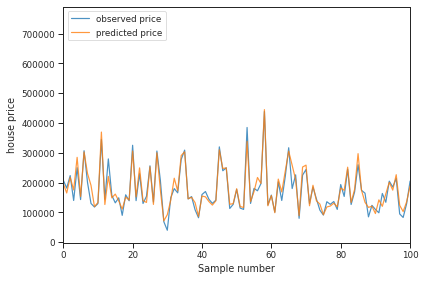

In [420]:
fig,ax = plt.subplots()
plt.plot(y_train, alpha = 0.8,label=r"observed price")
plt.plot(forest.predict(X_train), alpha=0.8, label=r"predicted price")

#always label your axes
plt.xlabel(r"Sample number")
plt.ylabel(r"house price")

# create a legend
plt.legend(loc="upper left")
#ax.xaxis.set_minor_locator(MultipleLocator(2))
#ax.yaxis.set_minor_locator(MultipleLocator(0.2))
plt.xlim(0,100)
#plt.ylim(0.5,6)
plt.tight_layout()
plt.savefig("House_price_regression.png", dpi=600)
#sns.despine()
plt.show()

# Forest 75:25 split to verify that the prediction is valid and comparing it to the original dataset that we had (first train without test data) - Ians first part

In [421]:
#type(y_predicted)
y_predicted = pd.DataFrame(y_predicted, columns = ['SalePrice'])
y_all_data = pd.concat((y_train, y_predicted)).reset_index(drop=True)
y_all_data.shape

(2919, 1)

In [422]:

X_all_data = pd.concat((X_train, X_test)).reset_index(drop=True)
X_all_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,3,65.0,8450,1,3,3,0,4,0,...,61,0,0,0,0,0,2,2008,8,4
1,20,3,80.0,9600,1,3,3,0,2,0,...,0,0,0,0,0,0,5,2007,8,4
2,60,3,68.0,11250,1,0,3,0,4,0,...,42,0,0,0,0,0,9,2008,8,4
3,70,3,60.0,9550,1,0,3,0,0,0,...,35,272,0,0,0,0,2,2006,8,0
4,60,3,84.0,14260,1,0,3,0,2,0,...,84,0,0,0,0,0,12,2008,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,4,21.0,1936,1,3,3,0,4,0,...,0,0,0,0,0,0,6,2006,8,4
2915,160,4,21.0,1894,1,3,3,0,4,0,...,24,0,0,0,0,0,4,2006,8,0
2916,20,3,160.0,20000,1,3,3,0,4,0,...,0,0,0,0,0,0,9,2006,8,0
2917,85,3,62.0,10441,1,3,3,0,4,0,...,32,0,0,0,0,700,7,2006,8,4


In [423]:
X_train75, X_test75, y_train75, y_test75 = train_test_split(X_all_data,y_all_data, random_state=1, train_size=0.75)

In [424]:
forest = RandomForestRegressor()
forest.fit(X_train75, y_train75)

<ipython-input-424-cbc497cb79c8>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train75, y_train75)


RandomForestRegressor()

In [425]:
print("model score on training data:", forest.score(X_train75, y_train75))
print("model score on test data:", forest.score(X_test75, y_test75))

model score on training data: 0.9899156363571194
model score on test data: 0.9246197567546347


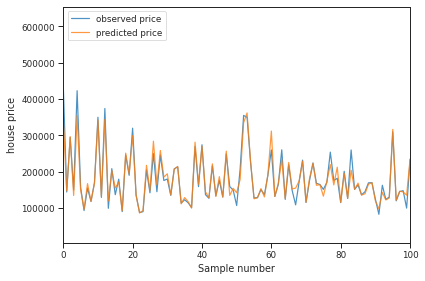

In [428]:
fig,ax = plt.subplots()
plt.plot(y_test75.to_numpy(), alpha = 0.8,label=r"observed price")
plt.plot(forest.predict(X_test75), alpha=0.8, label=r"predicted price")

#always label your axes
plt.xlabel(r"Sample number")
plt.ylabel(r"house price")

# create a legend
plt.legend(loc="upper left")
#ax.xaxis.set_minor_locator(MultipleLocator(2))
#ax.yaxis.set_minor_locator(MultipleLocator(0.2))
plt.xlim(0,100)
#plt.ylim(0.5,6)
plt.tight_layout()
plt.savefig("House_price_regression.png", dpi=600)
#sns.despine()
plt.show()